In [13]:
import pandas as pd
import re
import nltk
import string
import google_conf
from importlib import reload
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [14]:
plt.style.use('seaborn-white')
plt.rcParams['figure.dpi'] = 300
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams['font.size'] = 8

def save_figure(fig, fig_name):
    fig.savefig("../figures/" + fig_name + ".tiff")
    fig.savefig("../figures/" + fig_name + ".png")

/var/folders/zg/zvg9y3rs7j527jxfq9sc2xqc0000gn/T/ipykernel_4724/1576836852.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [15]:
pop_data = google_conf.setup(sheet_url="https://docs.google.com/spreadsheets/d/1o8L0Rt4CzQ_DcYdaKgCdige4nJs0sydlTGiMBSstQtc/edit?usp=sharing", service_account_path="../../ServiceAccountsKey.json")

In [16]:
articles_metadata = pd.read_json("../data/article_metadata_with_filepaths.json")
articles_metadata.head(5)

,year,authors,journal,title,type,pdf?,keywords,keywords_online?,notes,filepath,pop_id
0,2011,Bos et al.,Political Communication,How the Media Shape Perceptions of Right-Wing ...,article,y,y,y,None,Political Communication/2011 - Bos et al. - Ho...,0
1,2019,Blassnig et al.,Political Communication,Hitting a Nerve: Populist News Articles Lead t...,article,y,y,y,None,Political Communication/2019 - Blassing et al....,1
2,2017,Caramani,American Political Science Review,Will vs. Reason: The Populist and Technocratic...,article,y,y,None,None,American Political Science Review/2017 - Caram...,2
3,2020,"Wuttke,Schimpf, Schoen",American Political Science Review,When the Whole Is Greater than the Sum of Its ...,article,y,y,None,None,American Political Science Review/2020 - Wuttk...,3
4,2014,Treib,Journal of European Public Policy,"The voter says no, but nobody listens: causes ...",article,y,y,None,None,Journal of European Public Policy/2014 - Treib...,4


In [17]:
articles_metadata = articles_metadata[articles_metadata["filepath"].apply(bool)].copy()

In [18]:
sample_pop_ids = [62, 377, 188, 364, 499, 228, 376, 90, 227, 330]

# Test with one document

In [19]:
pop_id = 90
path = "../data/large_data/articles_filteredtexts/"
filename = "filteredtext_pop_id_{}.txt".format(str(pop_id))

In [20]:
with open(path + filename, "r") as f:
    filteredtext = f.read()

In [21]:
test_str_list = filteredtext.split()[:100]
print(test_str_list)

['State', 'of', 'the', 'field:', 'How', 'to', 'study', 'populism', 'and', 'adjacent', 'topics?', 'A', 'plea', 'for', 'both', 'more', 'and', 'less', 'focus', 'MATTHIJS', 'ROODUIJN', 'Department', 'of', 'Political', 'Science,', 'University', 'of', 'Amsterdam,', 'The', 'Netherlands', 'Abstract.', 'As', 'a', 'result', 'of', 'the', 'steady', 'rise', 'of', 'populist', 'parties', 'and', 'politicians', 'all', 'over', 'the', 'world', '–', 'and', 'particularly', 'since', 'the', 'Brexit', 'referendum', 'and', 'the', 'election', 'of', 'Donald', 'Trump', '–', 'populism', 'research', 'has', 'become', 'increasingly', 'popular', 'and', 'widespread.', 'The', 'field,', 'however,', 'also', 'faces', 'some', 'tricky', 'challenges.', 'First,', 'it', 'is', 'easy', 'to', 'confuse', 'populism', 'with', 'related', 'concepts', 'like,', 'for', 'instance,', '‘nativism’', 'and', '‘Euroscepticism’.', 'This', 'brings', 'the', 'risk', 'of', 'sloppy', 'conceptualisation,']


# populis* usage overview

In [22]:
# gather indeces:
filteredtext_split = filteredtext.split()
inxs = [t[0] for t in enumerate(filteredtext_split) if re.search("populis", t[1], re.IGNORECASE)]
inxs

[7,
 39,
 61,
 83,
 107,
 128,
 159,
 201,
 211,
 213,
 252,
 254,
 283,
 324,
 336,
 361,
 363,
 408,
 417,
 438,
 504,
 528,
 536,
 545,
 554,
 581,
 627,
 638,
 655,
 679,
 694,
 708,
 771,
 800,
 868,
 888,
 895,
 912,
 975,
 998,
 1042,
 1056,
 1078,
 1087,
 1130,
 1173,
 1187,
 1192,
 1204,
 1226,
 1271,
 1310,
 1319,
 1356,
 1369,
 1376,
 1409,
 1432,
 1445,
 1448,
 1469,
 1487,
 1556,
 1599,
 1618,
 1633,
 1648,
 1666,
 1687,
 1728,
 1785,
 1800,
 1848,
 1871,
 1881,
 1905,
 1919,
 1955,
 1969,
 1989,
 2055,
 2066,
 2118,
 2147,
 2179,
 2212,
 2230,
 2250,
 2259,
 2265,
 2322,
 2332,
 2361,
 2440,
 2533,
 2567,
 2594,
 2624,
 2660,
 2752,
 2762,
 2783,
 2794,
 2813,
 2825,
 2861,
 2926,
 3022,
 3046,
 3078,
 3100,
 3119,
 3212,
 3219,
 3271,
 3336,
 3368,
 3379,
 3398,
 3442,
 3451,
 3627,
 3643,
 3663,
 3717,
 3776,
 3836,
 3878,
 3901,
 3912,
 3936,
 3979,
 4017,
 4041,
 4082,
 4103,
 4131,
 4144,
 4172,
 4210]

In [23]:
for i in inxs:
    print(filteredtext_split[i-2:i+3])


['to', 'study', 'populism', 'and', 'adjacent']
['rise', 'of', 'populist', 'parties', 'and']
['Trump', '–', 'populism', 'research', 'has']
['to', 'confuse', 'populism', 'with', 'related']
['inferences.', 'Second,', 'populism', 'research', 'remains']
['with', 'these', 'challenges,populism', 'research', 'should']
['other', 'researchers,', 'populism', 'scholars', 'should']
['can', 'inspire', 'populism', 'scholars', 'to']
['expectations.', 'Keyword:', 'populism', 'Introduction', 'Populism']
['populism', 'Introduction', 'Populism', 'is', 'sexy.Particularly']
['the', 'terms', '‘populism’', 'or', '‘populist’']
['‘populism’', 'or', '‘populist’', '671', 'times.']
['in', '2017', '‘populism’', 'was', 'declared']
['rise', 'of', 'populist', 'parties', 'and']
['appeal', 'of', 'populism', 'is', 'also']
['the', 'words', '‘populism’', 'or', '‘populist’']
['‘populism’', 'or', '‘populist’', 'in', 'the']
['devoted', 'to', 'populism!', 'It', 'seems']
['research', 'on', 'populism', 'has', 'become']
['literat

In [24]:
def extract_indeces(pop_id):
    path = "../data/large_data/articles_filteredtexts/"
    filename = "filteredtext_pop_id_{}.txt".format(str(pop_id))
    with open(path + filename, "r") as f:
        filteredtext = f.read()
    filteredtext_split = filteredtext.split()
    inxs = [t[0] for t in enumerate(filteredtext_split) if re.search("populis", t[1], re.IGNORECASE)]
    return inxs
articles_metadata["populism_inxs"] = articles_metadata["pop_id"].apply(extract_indeces)

In [25]:
articles_metadata["populism_inxs"]

0      [30, 66, 129, 147, 185, 288, 309, 335, 339, 34...
1      [26, 35, 64, 73, 132, 141, 196, 220, 236, 237,...
2      [19, 42, 57, 97, 138, 163, 377, 504, 579, 671,...
3      [65, 125, 142, 195, 225, 254, 282, 304, 313, 3...
4              [302, 2403, 4023, 4131, 4575, 4617, 4738]
                             ...                        
537                               [155, 238, 2478, 3747]
538    [25, 516, 526, 534, 556, 752, 1169, 1203, 1216...
539    [7, 52, 98, 317, 387, 393, 453, 650, 661, 721,...
540    [3, 58, 194, 216, 257, 877, 904, 1023, 1564, 2...
541    [16, 22, 26, 80, 95, 109, 114, 131, 153, 162, ...
Name: populism_inxs, Length: 542, dtype: object

In [26]:
articles_metadata["populis*_N"] = articles_metadata["populism_inxs"].apply(len)

In [27]:
articles_metadata["populis*_N"].sum()

42027

In [28]:
replace_tups = [
    ("populists", "populis*"),
    ("populisms", "populis*"),
    ("populist", "populis*"),
    ("populism", "populis*"),
]
def clean_conc(conc_string):
    conc_cleaned = " ".join([re.sub("\W", "", w, count=10) for w in conc_string.lower().split()])
    conc_cleaned = re.sub("\d+", "", conc_cleaned, count=10)
    #conc_cleaned = conc_cleaned.lower().translate(str.maketrans("", "", string.punctuation))
    for tup in replace_tups:
        conc_cleaned = conc_cleaned.replace(tup[0], tup[1])
    return conc_cleaned

In [29]:
clean_conc("4right-wing populists.12@#`^&")

'rightwing populis*'

In [30]:
def get_concordance(row, left=1, right=1):
    pop_id = row["pop_id"]
    path = "../data/large_data/articles_filteredtexts/"
    filename = "filteredtext_pop_id_{}.txt".format(str(pop_id))
    with open(path + filename, "r") as f:
        filteredtext = f.read()
    filteredtext_split = filteredtext.split()
    inxs = row["populism_inxs"]
    conc_data = [clean_conc(" ".join(filteredtext_split[i-left: i+right+1])) for i in inxs]
    return conc_data

In [31]:
articles_metadata["conc_left1"] = articles_metadata.apply(lambda row: get_concordance(row, left=1, right=0), axis=1)
articles_metadata["conc_right1"] = articles_metadata.apply(lambda row: get_concordance(row, left=0, right=1), axis=1)

In [32]:
articles_metadata

,year,authors,journal,title,type,pdf?,keywords,keywords_online?,notes,filepath,pop_id,populism_inxs,populis*_N,conc_left1,conc_right1
0,2011,Bos et al.,Political Communication,How the Media Shape Perceptions of Right-Wing ...,article,y,y,y,None,Political Communication/2011 - Bos et al. - Ho...,0,"[30, 66, 129, 147, 185, 288, 309, 335, 339, 34...",205,"[rightwing populis*, rightwing populis*, right...","[populis* leaders, populis* leaders, populis* ..."
1,2019,Blassnig et al.,Political Communication,Hitting a Nerve: Populist News Articles Lead t...,article,y,y,y,None,Political Communication/2019 - Blassing et al....,1,"[26, 35, 64, 73, 132, 141, 196, 220, 236, 237,...",237,"[nerve populis*, more populis*, nerve populis*...","[populis* news, populis* reader, populis* news..."
2,2017,Caramani,American Political Science Review,Will vs. Reason: The Populist and Technocratic...,article,y,y,None,None,American Political Science Review/2017 - Caram...,2,"[19, 42, 57, 97, 138, 163, 377, 504, 579, 671,...",122,"[the populis*, analytically populis*, that pop...","[populis* and, populis* and, populis* and, pop..."
3,2020,"Wuttke,Schimpf, Schoen",American Political Science Review,When the Whole Is Greater than the Sum of Its ...,article,y,y,None,None,American Political Science Review/2020 - Wuttk...,3,"[65, 125, 142, 195, 225, 254, 282, 304, 313, 3...",301,"[of populis*, both conceptuallyandempiricallyt...","[populis* attitudes, conceptuallyandempiricall..."
4,2014,Treib,Journal of European Public Policy,"The voter says no, but nobody listens: causes ...",article,y,y,None,None,Journal of European Public Policy/2014 - Treib...,4,"[302, 2403, 4023, 4131, 4575, 4617, 4738]",7,"[euroscepticism populis*, on populis*, on popu...","[populis* secondorder, populis* and, populis* ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,2018,Grzymala-Busse,Current History,Poland’s Path to Illiberalism,article,y,y,None,None,Current History/2018 - Grzymala-Busse - Poland...,537,"[155, 238, 2478, 3747]",4,"[illiberal populis*, of populis*, often populi...","[populis* it, populis* pis, populis* and, popu..."
538,2017,Eichengreen,Current History,The Populist Turn in American Politics,article,y,y,None,None,Current History/2017 - Eichengreen - The Popul...,538,"[25, 516, 526, 534, 556, 752, 1169, 1203, 1216...",24,"[the populis*, new populis*, old populis*, the...","[populis* turn, populis* bears, populis* of, p..."
539,2014,Mudde,Current History,The Far Right and the European Elections,article,y,y,None,None,Current History/2014 - Mudde - The Far Right a...,539,"[7, 52, 98, 317, 387, 393, 453, 650, 661, 721,...",18,"[antieuropean populis*, antieuropean populis*,...","[populis* are, populis* in, populis* backlash,..."
540,2020,Cano,European History Quarterly,Printing the People,article,y,y,None,None,European History Quarterly/2020 - Cano - Print...,540,"[3, 58, 194, 216, 257, 877, 904, 1023, 1564, 2...",40,"[people populis*, this populis*, nationalism p...","[populis* photography, populis* nationalism, p..."


In [33]:
conc_left1_all = []
for conc_list in articles_metadata["conc_left1"]:
    conc_left1_all.extend(conc_list)

In [34]:
len(conc_left1_all)

42027

In [35]:
conc_left1_all_df = pd.DataFrame(nltk.FreqDist(conc_left1_all).most_common(), columns=["conc", "count"])
conc_left1_all_df[:100]

,conc,count
0,of populis*,7735
1,the populis*,3201
2,rightwing populis*,1703
3,that populis*,1437
4,a populis*,1399
...,...,...
95,transnational populis*,38
96,using populis*,37
97,however populis*,37
98,illiberal populis*,37


In [149]:
#google_conf.set_with_dataframe(pop_data.add_worksheet("conc_left1", 1,1), conc_left1_all_df)

In [36]:
conc_left1_interesting = ['rightwing populis*', 'leftwing populis*', 'right populis*',  'left populis*', 'radical populis*', 'authoritarian populis*', 'class populis*',  'exclusionary populis*', 'economic populis*', 'leftist populis*', 'political populis*', 'radicalright populis*']
conc_left1_interesting

['rightwing populis*',
 'leftwing populis*',
 'right populis*',
 'left populis*',
 'radical populis*',
 'authoritarian populis*',
 'class populis*',
 'exclusionary populis*',
 'economic populis*',
 'leftist populis*',
 'political populis*',
 'radicalright populis*']

In [37]:
conc_left1_interesting_df = conc_left1_all_df[conc_left1_all_df["conc"].isin(conc_left1_interesting)]
conc_left1_interesting_df

,conc,count
2,rightwing populis*,1703
14,leftwing populis*,387
16,right populis*,238
21,left populis*,179
37,authoritarian populis*,95
41,radical populis*,87
43,exclusionary populis*,84
55,class populis*,72
56,economic populis*,68
63,political populis*,61


In [38]:
#google_conf.set_with_dataframe(pop_data.add_worksheet("conc_left1_interesting",1,1), conc_left1_interesting_df)

In [41]:
def ectract_counts_of_interesting(list_of_concs):
    conc_count_dict = dict([(conc, list_of_concs.count(conc)) for conc in conc_left1_interesting])
    return conc_count_dict
articles_metadata["conc_left1_interesting"] = articles_metadata["conc_left1"].apply(ectract_counts_of_interesting)

In [42]:
articles_metadata.head(20)

,year,authors,journal,title,type,pdf?,keywords,keywords_online?,notes,filepath,pop_id,populism_inxs,populis*_N,conc_left1,conc_right1,conc_left1_interesting
0,2011,Bos et al.,Political Communication,How the Media Shape Perceptions of Right-Wing ...,article,y,y,y,None,Political Communication/2011 - Bos et al. - Ho...,0,"[30, 66, 129, 147, 185, 288, 309, 335, 339, 34...",205,"[rightwing populis*, rightwing populis*, right...","[populis* leaders, populis* leaders, populis* ...","{'rightwing populis*': 113, 'leftwing populis*..."
1,2019,Blassnig et al.,Political Communication,Hitting a Nerve: Populist News Articles Lead t...,article,y,y,y,None,Political Communication/2019 - Blassing et al....,1,"[26, 35, 64, 73, 132, 141, 196, 220, 236, 237,...",237,"[nerve populis*, more populis*, nerve populis*...","[populis* news, populis* reader, populis* news...","{'rightwing populis*': 3, 'leftwing populis*':..."
2,2017,Caramani,American Political Science Review,Will vs. Reason: The Populist and Technocratic...,article,y,y,None,None,American Political Science Review/2017 - Caram...,2,"[19, 42, 57, 97, 138, 163, 377, 504, 579, 671,...",122,"[the populis*, analytically populis*, that pop...","[populis* and, populis* and, populis* and, pop...","{'rightwing populis*': 2, 'leftwing populis*':..."
3,2020,"Wuttke,Schimpf, Schoen",American Political Science Review,When the Whole Is Greater than the Sum of Its ...,article,y,y,None,None,American Political Science Review/2020 - Wuttk...,3,"[65, 125, 142, 195, 225, 254, 282, 304, 313, 3...",301,"[of populis*, both conceptuallyandempiricallyt...","[populis* attitudes, conceptuallyandempiricall...","{'rightwing populis*': 0, 'leftwing populis*':..."
4,2014,Treib,Journal of European Public Policy,"The voter says no, but nobody listens: causes ...",article,y,y,None,None,Journal of European Public Policy/2014 - Treib...,4,"[302, 2403, 4023, 4131, 4575, 4617, 4738]",7,"[euroscepticism populis*, on populis*, on popu...","[populis* secondorder, populis* and, populis* ...","{'rightwing populis*': 0, 'leftwing populis*':..."
5,2016,Hobolt,Journal of European Public Policy,"The Brexit vote: a divided nation, a divided c...",article,y,y,None,None,Journal of European Public Policy/2016 - Hobol...,5,"[247, 621, 823, 1046, 3348, 3382, 3939, 4283, ...",17,"[euroscepticism populis*, of populis*, the pop...","[populis* referendum, populis* parties, populi...","{'rightwing populis*': 0, 'leftwing populis*':..."
6,2018,Kreuder-Sonnen,Journal of European Public Policy,An authoritarian turn in Europe and European S...,article,y,y,None,None,Journal of European Public Policy/2018 - Kreud...,6,"[200, 262, 624, 635, 754, 784, 1818, 2453, 259...",23,"[nationalist populis*, legitimacy populis*, na...","[populis* have, populis* introduction, populis...","{'rightwing populis*': 2, 'leftwing populis*':..."
7,2019,"McDonnell, Werner",Journal of European Public Policy,Differently Eurosceptic: radical right populis...,article,y,y,None,None,Journal of European Public Policy/2019 - McDon...,7,"[30, 54, 107, 134, 285, 298, 348, 385, 532, 65...",27,"[right populis*, right populis*, right populis...","[populis* parties, populis* parties, populis* ...","{'rightwing populis*': 1, 'leftwing populis*':..."
8,2019,Schmidt,Journal of European Public Policy,Politicization in the EU: between national pol...,article,y,y,None,None,Journal of European Public Policy/2019 - Schmi...,8,"[148, 308, 547, 717, 1594, 2092, 2180, 2247, 2...",14,"[euroskeptic populis*, commission populis*, by...","[populis* or, populis* eurozone, populis* chal...","{'rightwing populis*': 0, 'leftwing populis*':..."
9,2020,Bakker et al.,Journal of European Public Policy,"Multidimensional incongruence, political disaf...",article,y,y,None,None,Journal of European Public Policy/2020 - Bakke...,9,"[290, 1177, 1607, 1729, 1798, 3397, 3429, 3437...",13,"[representation populis*, for populis*, for po...","[populis* research, populis* radical, populis*...","{'rightwing populis*': 0, 'l

# Temporal overview

In [43]:
pop_id = 99

In [44]:
def get_split_text(pop_id):
    path = "../data/large_data/articles_filteredtexts/"
    filename = "filteredtext_pop_id_{}.txt".format(str(pop_id))
    with open(path + filename, "r") as f:
        filteredtext = f.read()
    return filteredtext.split()

def get_len(pop_id):
    path = "../data/large_data/articles_filteredtexts/"
    filename = "filteredtext_pop_id_{}.txt".format(str(pop_id))
    with open(path + filename, "r") as f:
        filteredtext = f.read()
    return len(filteredtext.split())

In [45]:
print(get_split_text(507))

['Full', 'Terms', '&', 'Conditions', 'of', 'access', 'and', 'use', 'can', 'be', 'found', 'at', 'https://www.tandfonline.com/action/journalInformation?journalCode=rcri20', 'Critical', 'Review', 'A', 'Journal', 'of', 'Politics', 'and', 'Society', 'ISSN:', '(Print)', '(Online)', 'Journal', 'homepage:', 'https://www.tandfonline.com/loi/rcri20', 'Populists', 'as', 'Technocrats', 'Jeffrey', 'Friedman', 'To', 'cite', 'this', 'article:', 'Jeffrey', 'Friedman', '(2019)', 'Populists', 'as', 'Technocrats,', 'Critical', 'Review,', '31:-4,', '315-376,', 'DOI:', '10./08913811..', 'To', 'link', 'to', 'this', 'article:', 'https://doi.org/10./08913811..', 'Published', 'online:', '13', 'Aug', '2020.', 'Submit', 'your', 'article', 'to', 'this', 'journal', 'Article', 'views:', '1236', 'View', 'related', 'articles', 'View', 'Crossmark', 'data', 'Citing', 'articles:', '5', 'View', 'citing', 'articles', 'ABSTRACT:', 'An', 'intellectually', 'charitable', 'understanding', 'of', 'populism', 'might', 'begin', 'b

In [46]:
len(get_split_text(507))

22447

In [47]:
articles_metadata["wordcount"] = articles_metadata["pop_id"].apply(get_len)

In [49]:
articles_metadata.sort_values("wordcount")

,year,authors,journal,title,type,pdf?,keywords,keywords_online?,notes,filepath,pop_id,populism_inxs,populis*_N,conc_left1,conc_right1,conc_left1_interesting,wordcount
397,2019,Breuilly et al.,Nations and Nationalism,Editorial,editorial,y,y,None,editorial nemá název - populism v textu,Nations and Nationalism/2017 - Breuilly et al....,397,[219],1,[nationalism populis*],[populis* authoritarianism],"{'rightwing populis*': 0, 'leftwing populis*':...",346
394,2017,Breuilly et al.,Nations and Nationalism,Editorial,editorial,y,y,None,editorial nemá název - populism v textu,Nations and Nationalism/2017 - Breuilly et al....,394,[219],1,[nationalism populis*],[populis* authoritarianism],"{'rightwing populis*': 0, 'leftwing populis*':...",346
225,2015,"Kettell, Kerr",British Politics,Editorial,editorial,y,y,y,nevim je to jen editorial kde je jednou slovo ...,"British Politics/2015 - Kettell, Kerr - Editor...",225,[299],1,[nationalism populis*],[populis* party],"{'rightwing populis*': 0, 'leftwing populis*':...",381
242,2016,"Ardoin, Gronke",PS: Political Science and Politics,EDITORS’ CORNER,article,y,y,None,není název - populism v textu,PS political science and politics journal/2016...,242,[614],1,[democratic populis*],[populis* as],"{'rightwing populis*': 0, 'leftwing populis*':...",1045
153,2019,Lizotte,Political Geography,Where are the people? Refocusing political geo...,article,y,y,None,None,Political Geography/2019 - Lizotte - Where are...,153,"[0, 40, 56, 78, 96, 108, 128, 147, 171, 194, 2...",48,"[, with populis*, and populis*, with populis*,...","[populis* as, populis* in, populis* politics, ...","{'rightwing populis*': 0, 'leftwing populis*':...",1771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,2020,"Fornaro, Kaihovaara",European Journal of Political Economy,"Microdynamics, granularity and populism: The F...",article,y,y,None,None,European Journal of Political Economy/2020 - F...,291,"[42, 77, 93, 96, 110, 137, 146, 165, 190, 206,...",198,"[churning populis*, to populis*, and populis*,...","[populis* granularity, populis* support, popul...","{'rightwing populis*': 5, 'leftwing populis*':...",17829
104,2019,Golec de Zavala et al.,Political Psychology,Collective Narcissism: Political Consequences ...,article,y,y,None,None,Political Psychology/2019 - Golec de Zavala et...,104,"[191, 313, 755, 846, 4572, 4587, 9049, 10230, ...",28,"[of populis*, hostility populis*, of populis*,...","[populis* rhetoric, populis* selfesteem, popul...","{'rightwing populis*': 0, 'leftwing populis*':...",17996
212,2020,Thornhill,International Theory,Constitutionalism and populism: national polit...,article,y,y,None,None,International Theory/2020 - Thornhill - Consti...,212,"[2, 48, 69, 126, 166, 185, 188, 230, 748, 749,...",119,"[and populis*, on populis*, many populis*, whi...","[populis* national, populis* government, popul...","{'rightwing populis*': 0, 'leftwing populis*':...",18282
507,2019,Friedman,Critical Review,Populists as Technocrats,article,y,y,None,None,Critical Review/2019 - Friedman - Populists as...,507,"[27, 39, 86, 93, 105, 118, 157, 220, 270, 281,...",193,"[httpswwwtandfonlinecomloircri populis*, popu...","[populis* as, populis* as, populis* might, pop...","{'rightwing populis*': 4, 'leftwing populis*':...",22447


In [243]:
len(articles_metadata)

542

In [247]:
journals = articles_metadata.groupby("journal").size().sort_values(ascending=False)
journals

journal
Journal of Democracy                     51
Democratization                          22
Political Studies                        21
The Political Quarterly                  20
Swiss Political Science Review           17
                                         ..
Politics & Gender                         1
Politics & Society                        1
Contemporary Politics                     1
European History Quarterly                1
Japanese Journal of Political Science     1
Length: 101, dtype: int64

In [248]:
len(journals)

101

In [159]:
articles_metadata["wordcount"].sum()

26576033

In [160]:
20000 * 500

10000000

In [161]:
for year in range(2011,2021):
    subset_df = articles_metadata[articles_metadata["year"]==year]
    text_list = []
    for pop_id in subset_df["pop_id"]:
        text_list.extend(get_split_text(pop_id))
    print(year, len(text_list))

2011 125176
2012 117748
2013 158083
2014 177664
2015 140541
2016 347966
2017 513461
2018 574906
2019 916430
2020 957002


<AxesSubplot: xlabel='year', ylabel='wordcount'>

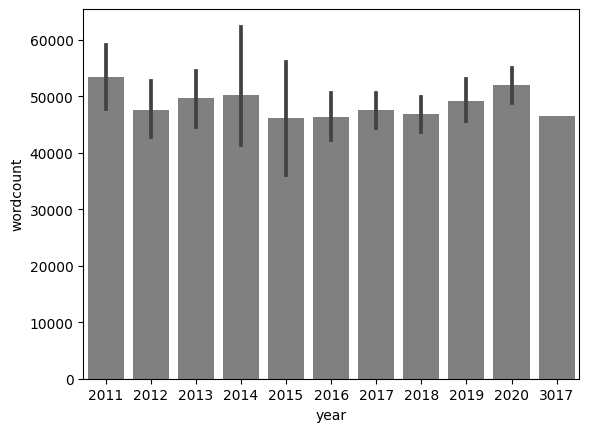

In [164]:
# average length of articles
sns.barplot(data=articles_metadata, x="year", y="wordcount", color="gray")

In [165]:
articles_metadata.groupby("year").sum()

,pop_id,populis*_N,wordcount
year,,,
2011,3813,1178,802726
2012,3915,766,762770
2013,5746,1140,1043049
2014,6839,2418,1157164
2015,5781,1597,923791
2016,13578,3814,2273743
2017,19226,5657,3373845
2018,19584,6097,3748893
2019,35559,9365,6054376


In [166]:
articles_metadata["year"] = articles_metadata["year"].replace(3017, 2017)

In [173]:
articles_metadata_sums = articles_metadata.groupby("year").sum().reset_index()
articles_metadata_sums

,year,pop_id,populis*_N,wordcount
0,2011,3813,1178,802726
1,2012,3915,766,762770
2,2013,5746,1140,1043049
3,2014,6839,2418,1157164
4,2015,5781,1597,923791
5,2016,13578,3814,2273743
6,2017,19542,5681,3420446
7,2018,19584,6097,3748893
8,2019,35559,9365,6054376
9,2020,32254,9971,6389075


In [183]:
articles_metadata_sums["populis*_freq"] = np.round(articles_metadata_sums["populis*_N"] / articles_metadata_sums["wordcount"], 4)

In [184]:
articles_metadata_sums

,year,pop_id,populis*_N,wordcount,populis*_freq
0,2011,3813,1178,802726,0.0015
1,2012,3915,766,762770,0.0010
2,2013,5746,1140,1043049,0.0011
3,2014,6839,2418,1157164,0.0021
4,2015,5781,1597,923791,0.0017
5,2016,13578,3814,2273743,0.0017
6,2017,19542,5681,3420446,0.0017
7,2018,19584,6097,3748893,0.0016
8,2019,35559,9365,6054376,0.0015
9,2020,32254,9971,6389075,0.0016


In [196]:
cm = plt.get_cmap("Greys")
color= cm(articles_metadata_sums["populis*_freq"] / articles_metadata_sums["populis*_freq"].max())

In [204]:
from matplotlib.cm import ScalarMappable


Text(0, 0.5, 'populis* frequency')

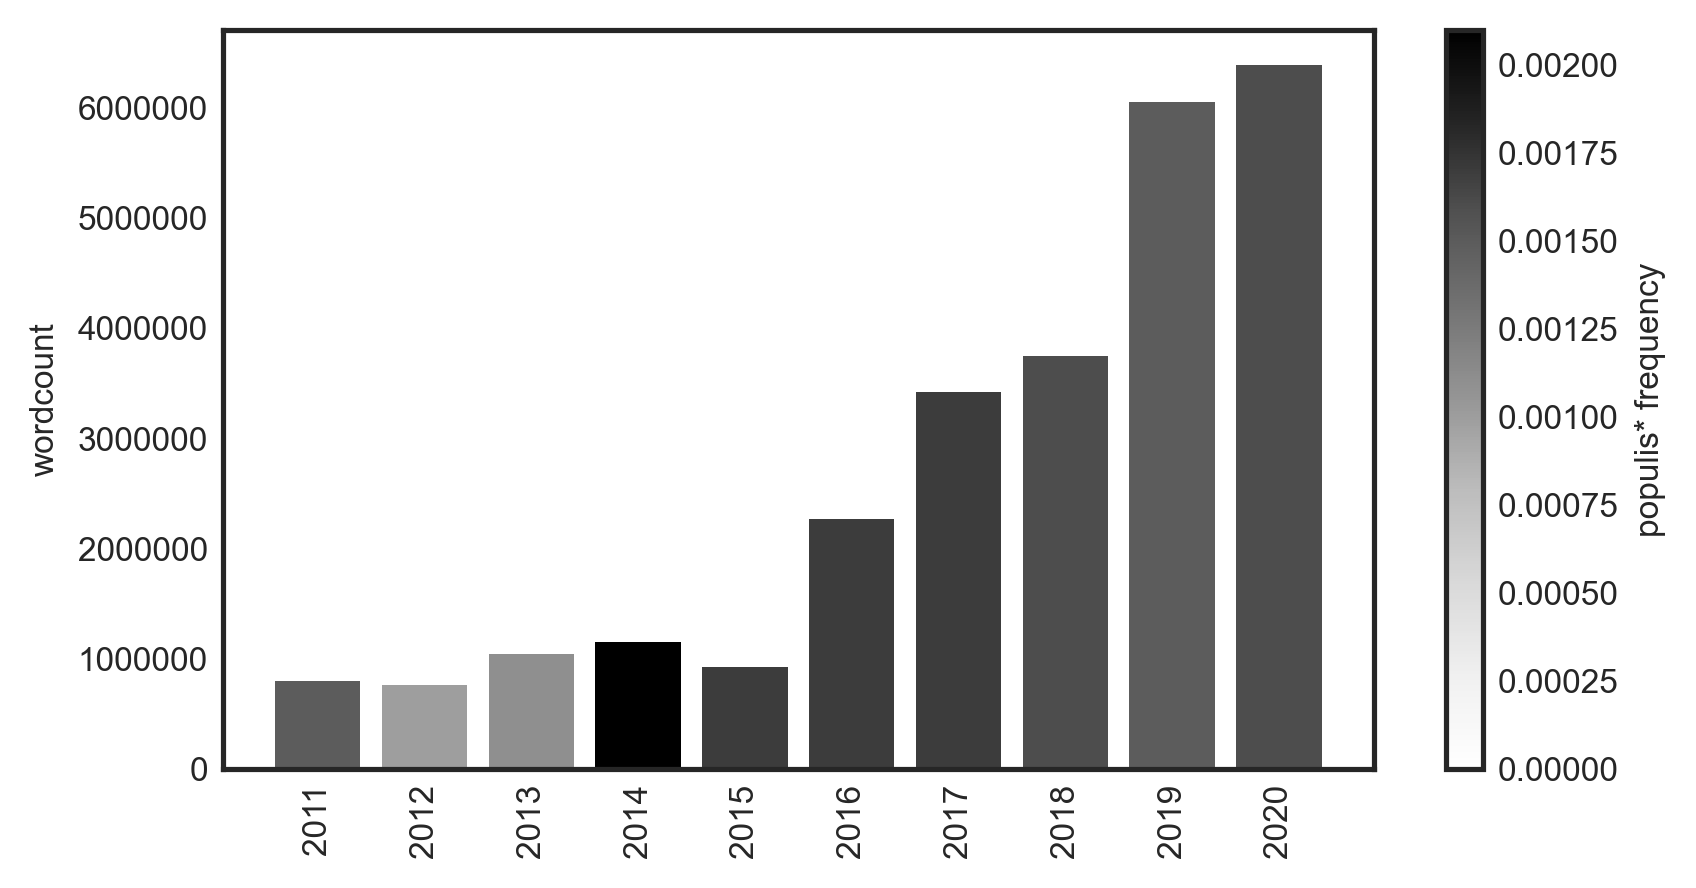

In [241]:
fig, ax = plt.subplots(figsize=(5.7, 3), dpi=300, tight_layout=True)
ax.bar(x=articles_metadata_sums["year"], height=articles_metadata_sums["wordcount"], color=color)
ax.ticklabel_format(style='plain')
ax.set_ylabel("wordcount")
ax.set_xticks(articles_metadata_sums["year"], )
ax.set_xticklabels(articles_metadata_sums["year"], rotation=90)

sm = ScalarMappable(cmap=cm)
# set colorbar properties
sm.set_array([])
sm.set_clim(0, articles_metadata_sums["populis*_freq"].max())

# create colorbar
cbar = plt.colorbar(sm, ax=ax)

# set colorbar label
cbar.ax.set_ylabel('populis* frequency')

In [242]:
fig.savefig("../figures/wordcount_by_years_bars.png")